In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
from glob import glob

# core nltk
import nltk
from nltk.tokenize import word_tokenize

# gensim magic
import gensim
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# load saved models
eebo_models = dict()
input_data = ["../models/eebo-1520-1529.w2v",
              "../models/eebo-1530-1539.w2v",
              "../models/eebo-1540-1549.w2v",
              "../models/eebo-1550-1559.w2v",
              "../models/eebo-1560-1569.w2v",
              "../models/eebo-1570-1579.w2v",
              "../models/eebo-1580-1589.w2v",
              "../models/eebo-1590-1599.w2v",
              "../models/eebo-1600-1609.w2v",
              "../models/eebo-1610-1619.w2v",
              "../models/eebo-1620-1629.w2v",
              "../models/eebo-1630-1639.w2v"]

for fp in input_data:
    
    model_name = os.path.basename(fp).split(".")[0]
    print("starting: {0}".format(model_name))

    eebo_models[model_name] = KeyedVectors.load(fp,mmap='r')

starting: eebo-1520-1529
starting: eebo-1530-1539
starting: eebo-1540-1549
starting: eebo-1550-1559
starting: eebo-1560-1569
starting: eebo-1570-1579
starting: eebo-1580-1589
starting: eebo-1590-1599
starting: eebo-1600-1609
starting: eebo-1610-1619
starting: eebo-1620-1629
starting: eebo-1630-1639


In [4]:
# select two terms
terms=["predestination","church"]

labels=[x.replace("eebo-","") for x in eebo_models.keys()]
d = list()
for model in eebo_models.keys():
    d.append(eebo_models[model].distance(terms[0],terms[1]))

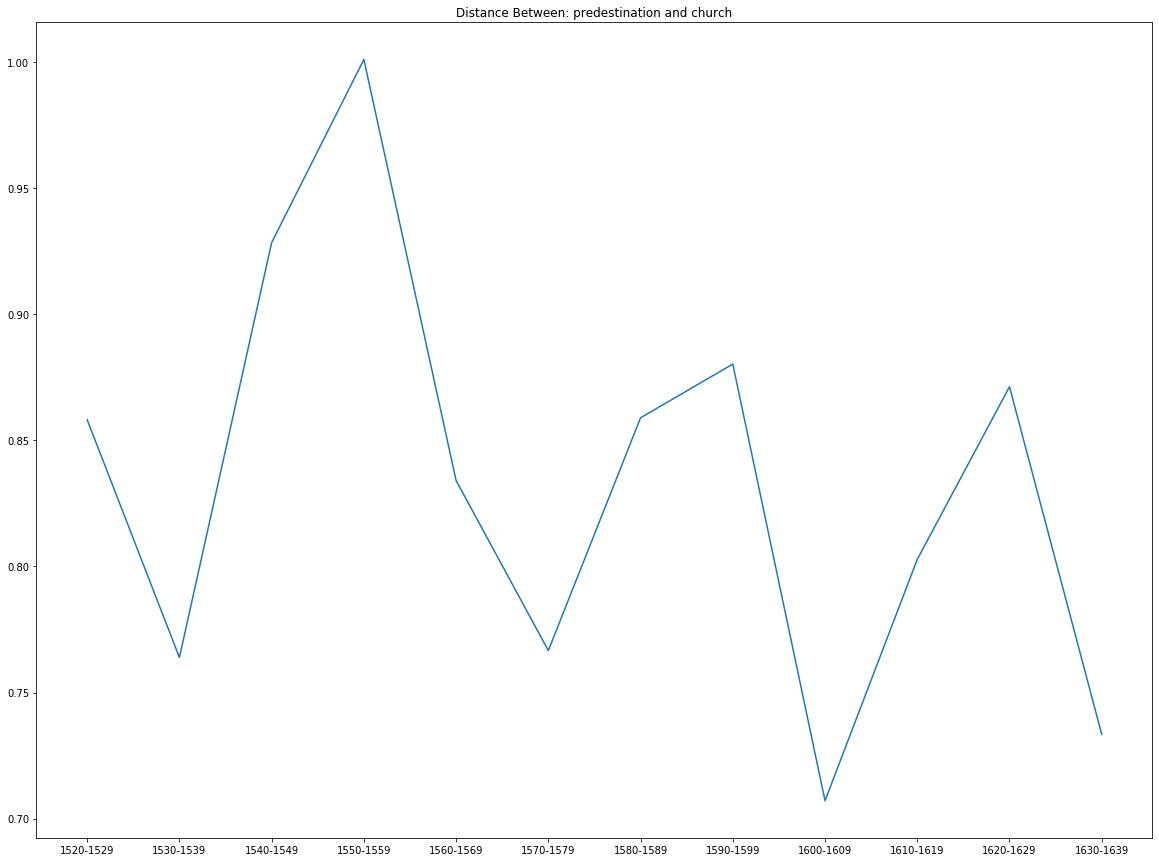

In [5]:
fig = plt.figure(figsize=(20, 15))
y = np.arange(len(d))
plt.plot(y,d)
plt.xticks(np.arange(len(labels)),labels)
plt.title("Distance Between: {0} and {1}".format(terms[0],terms[1]))
plt.show()